In [1]:
import numpy as np
from scipy import integrate
import matplotlib.pyplot as plt
%matplotlib inline


In [2]:
k = 1 #N/m
m = 1 #kg

#initial conditions
x0 =  np.array([1.0,0.0]) #[m, m/s]

t0 = 0 #s
tf = 15 #s
n = 100
t1 = np.linspace(t0,tf,n)

In [3]:
def shm(t, x, k, m):
    '''t is a numpy array
       x is a numpt array
       k is the spring constant
       m is the cart mass'''
    dx_dt = x[1]
    dv_dt = -k/m * x[0]
    return np.array([dx_dt, dv_dt])

In [4]:
def rungekutta_1(f,t,x0,args=()):
    n = len(t)
    x = np.zeros((n,len(x0)))
    x[0] = x0
    for i in range (0,n-1):
        x[i+1] = x[i] + (t[i+1] - t[i])*f(t[i],x[i],*args)
    return x

#We will have to pass this function a list of args, here it would be b,c
# *args refres to the address of where we defined args, so it picks up all listed 
# quantities in args

In [5]:
sol_rk1 = rungekutta_1(shm,t1,x0,args=(k,m)) #args order matters! they must match our equaton function order

#really an Nx2 e.g sol_rk1[N,2]
print(sol_rk1[:,1])

[ 0.         -0.15151515 -0.3030303  -0.45106715 -0.59214737 -0.72287252
 -0.84000383 -0.94054027 -1.02179288 -1.08145366 -1.1176573  -1.12903418
 -1.11475318 -1.07455312 -1.00876185 -0.91830223 -0.80468463 -0.66998571
 -0.51681377 -0.34826108 -0.16784397  0.02056811  0.21283335  0.40462642
  0.59153351  0.76915165  0.93319005  1.07957116  1.20452917  1.30470364
  1.37722592  1.41979634  1.43074999  1.4091096   1.35462372  1.26778913
  1.14985665  1.00281975  0.82938576  0.63293021  0.41743457  0.18740886
 -0.05219983 -0.29611083 -0.5388235  -0.77473839 -0.9982836  -1.20404326
 -1.38688549 -1.54208668 -1.66544937 -1.75341061 -1.8031384  -1.81261342
 -1.78069408 -1.70716286 -1.59275253 -1.43915113 -1.24898517 -1.02578084
 -0.77390376 -0.49847799 -0.20528583  0.0993498   0.40869815  0.71576575
  1.01345092  1.29470437  1.55269219  1.78095769  1.97357828  2.12531371
  2.23174202  2.28937983  2.2957839   2.24963104  2.15077423  2.000273
  1.80039679  1.55460063  1.26747304  0.94465674  0.5

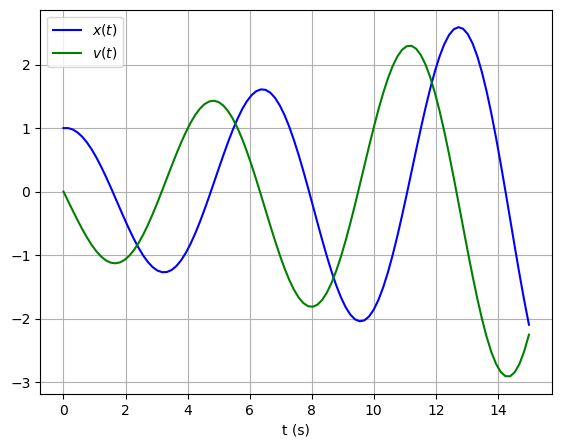

In [6]:

fig = plt.figure('Runge-Kutta 1')
ax = fig.add_axes([0.1,0.1,0.8,0.8])

#draw x and v
ax.plot(t1,sol_rk1[:,0],'b', label=r'$x(t)$')
ax.plot(t1,sol_rk1[:,1],'g', label=r'$v(t)$')


ax.legend(loc='best')
ax.set_xlabel('t (s)')
ax.grid()


In [7]:

t2 = np.linspace(t0,tf,1000)
sol_rk2 = rungekutta_1(shm,t2,x0,args=(k,m)) #args order matters! they must match our equaton function order


In [8]:

t3 = np.linspace(t0,tf,10000)
sol_rk3 = rungekutta_1(shm,t3,x0,args=(k,m)) #args order matters! they must match our equaton function order

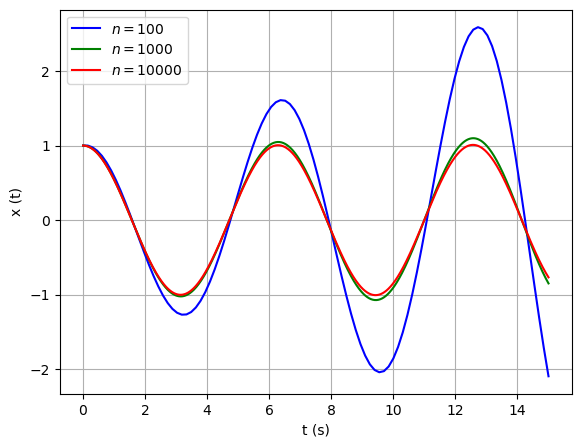

In [9]:
fig = plt.figure('Runge-Kutta Step Size')
ax = fig.add_axes([0.1,0.1,0.8,0.8])
ax.plot(t1,sol_rk1[ :,0],'b', label=r'$n = 100$')
ax.plot(t2,sol_rk2[ :,0], 'g', label=r'$n = 1000$')
ax.plot(t3,sol_rk3[ :,0], 'r', label=r'$n = 10000$')
ax.legend(loc='best')
ax.set_xlabel('t (s)')
ax.set_ylabel('x (t)')
ax.grid();

In [10]:
def rungekutta_2(f,t,x0, args=()):
    n = len(t)
    x = np.zeros( ( n, len(x0) ) )
    x[0] = x0 #set inital condition 
    for i in range (0,n-1):      
        dt = t[i+1]-t[i]
        k1 = f(t[i],x[i],*args)
        k2 = f(t[i]+dt/2.0,x[i]+dt/2.0 *k1,*args)
        x[i+1] = x[i] +dt*k2                
    return x



In [11]:

sol_rk2_1 = rungekutta_2(shm,t1,x0,args=(k,m)) #args order matters! they must match our equaton function order

t2 = np.linspace(t0,tf,1000)
sol_rk2_2 = rungekutta_2(shm,t2,x0,args=(k,m)) #args order matters! they must match our equaton function order

t3 = np.linspace(t0,tf,10000)
sol_rk2_3 = rungekutta_2(shm,t3,x0,args=(k,m)) #args order matters! they must match our equaton function order

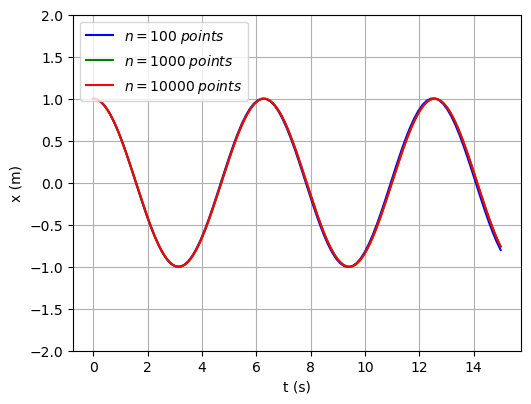

In [12]:
fig = plt.figure("n Comparison (RK2)")
ax = fig.add_axes([0.2,0.2,0.7,0.7])

ax.plot(t1,sol_rk2_1[ :,0],'b', label=r'$n = 100\; points$')
ax.plot(t2,sol_rk2_2[ :,0], 'g', label=r'$n = 1000\; points$')
ax.plot(t3,sol_rk2_3[ :,0], color='r', label=r'$n = 10000\; points$')

ax.legend(loc='best')
ax.set_xlabel('t (s)')
ax.set_ylabel('x (m)')
plt.ylim(-2,2)
plt.grid()

In [13]:
sol_RK45 = integrate.solve_ivp(shm,(t0,tf),x0,method='RK45', t_eval=t1, args=(k,m))
sol_RK23 = integrate.solve_ivp(shm,(t0,tf),x0,method='RK23', t_eval=t1, args=(k,m))

sol_RK45


  message: 'The solver successfully reached the end of the integration interval.'
     nfev: 116
     njev: 0
      nlu: 0
      sol: None
   status: 0
  success: True
        t: array([ 0.        ,  0.15151515,  0.3030303 ,  0.45454545,  0.60606061,
        0.75757576,  0.90909091,  1.06060606,  1.21212121,  1.36363636,
        1.51515152,  1.66666667,  1.81818182,  1.96969697,  2.12121212,
        2.27272727,  2.42424242,  2.57575758,  2.72727273,  2.87878788,
        3.03030303,  3.18181818,  3.33333333,  3.48484848,  3.63636364,
        3.78787879,  3.93939394,  4.09090909,  4.24242424,  4.39393939,
        4.54545455,  4.6969697 ,  4.84848485,  5.        ,  5.15151515,
        5.3030303 ,  5.45454545,  5.60606061,  5.75757576,  5.90909091,
        6.06060606,  6.21212121,  6.36363636,  6.51515152,  6.66666667,
        6.81818182,  6.96969697,  7.12121212,  7.27272727,  7.42424242,
        7.57575758,  7.72727273,  7.87878788,  8.03030303,  8.18181818,
        8.33333333,  8.484848

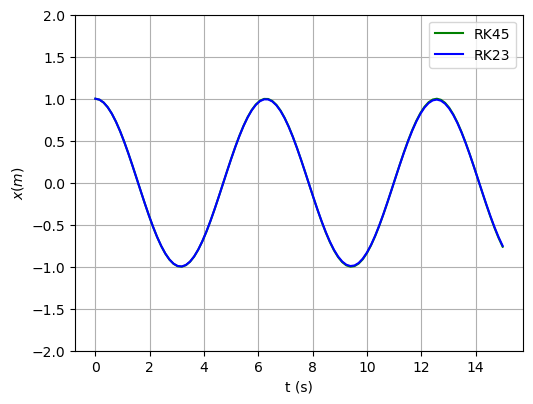

In [14]:
fig = plt.figure("Scipy)")
ax = fig.add_axes([0.2,0.2,0.7,0.7])

#draw curves
ax.plot(t1,sol_RK45.y[0],'g',label='RK45')
ax.plot(t1,sol_RK23.y[0],'b',label='RK23')


ax.legend(loc='best')
ax.set_xlabel('t (s)')
ax.set_ylabel(r'$x (m)$')
plt.ylim(-2,2)
ax.grid();

In [15]:
def shm_friction(t,x,k,m,c):
    '''t is a numpy array
       x is a numpt array
       k is the spring constant
       m is the cart mass
       c is a constant for air resistance'''
    dx_dt = x[1]
    dv_dt = -k/m * x[0]- c/m*x[1]
    return np.array([dx_dt, dv_dt])

In [16]:
k = 1 #N/m
m = 1 #kg
c = 0.08 #kg/s

#initial conditions
x0 = np.array([1.0,0.0]) #[m, m/s]

t0 = 0 #s
tf = 60 #s
n = 100
t = np.linspace(t0,tf,n)

env = x0[0]*np.exp(-c*t/(2*m))

In [17]:
sol_RK45_friction = integrate.solve_ivp(shm_friction,(t0,tf),x0,method='RK45', t_eval=t, args = (k,m,c))
#sol_RK45_friction


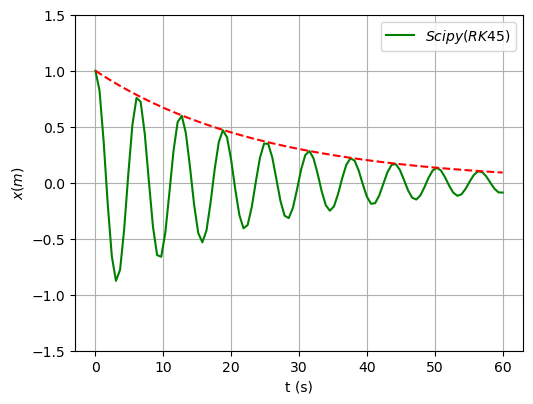

In [18]:
fig = plt.figure("SHM with Friction)")
ax = fig.add_axes([0.2,0.2,0.7,0.7])

ax.plot(t,sol_RK45_friction.y[0],'g', label=r'$Scipy (RK45)$')
ax.plot(t,env,'r--', label='')

ax.legend(loc='best')
ax.set_xlabel('t (s)')
ax.set_ylabel(r'$x (m)$')
plt.ylim(-1.5,1.5)
ax.grid();